# **Project Name**    - **Video Game Sales and Engagement Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Ruxana.E


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project analyzes and visualizes video game sales and user engagement data to identify trends in game popularity, player behavior, and platform performance. By merging sales and engagement datasets, the analysis uncovers how game features, genres, and platforms influence sales, wishlists, and ratings. SQL is used to structure and manage the data, while Power BI dashboards provide actionable insights to support decision-making for game developers, marketers, and publishers.

#### **Define Your Business Objective?**

• Improved Marketing Strategy: Identifies high-performing genres and platforms, enabling targeted marketing campaigns that increase reach and conversion while reducing wasted spend.

• Data-Driven Product Development: Reveals which game features, genres, and ratings correlate with strong engagement and sales, helping developers prioritize features that drive successful launches.

• Better Sales Forecasting: Uses historical sales and wishlist trends to anticipate demand more accurately, supporting informed release planning and inventory decisions.

• Optimized Resource Allocation: Highlights regions, platforms, and genres with high opportunity and low saturation, allowing publishers to allocate development and marketing resources more effectively.

• Risk Reduction: Early identification of low-performing segments helps stakeholders adjust strategies before launch, reducing financial and operational risk.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
df1=pd.read_csv(r"C:\Users\hp\Downloads\games.csv")
df2=pd.read_csv(r"C:\Users\hp\Downloads\vgsales.csv")

### Dataset First View

In [3]:
# Dataset First Look
df1.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
df2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df1.shape

(1512, 14)

In [6]:
df2.shape

(16598, 11)

### Dataset Information

In [7]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

0

In [10]:
df2.duplicated().sum()

0

In [11]:
# Duplicates based on Title only
title_duplicates = df1[df1.duplicated(subset=['Title'], keep="first")]
title_duplicates.sort_values('Title').head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
969,969,A Plague Tale: Innocence,"May 14, 2019","['Focus Entertainment', 'Asobo Studio']",3.7,852,852,"['Adventure', 'RPG']","A Plague Tale: Innocence, on PlayStation 4, Xb...",['Antes da review vale ressaltar que peguei o ...,5.4K,202,2.6K,1K
454,454,A Plague Tale: Innocence,"May 14, 2019","['Focus Entertainment', 'Asobo Studio']",3.7,852,852,"['Adventure', 'RPG']","A Plague Tale: Innocence, on PlayStation 4, Xb...",['Antes da review vale ressaltar que peguei o ...,5.4K,202,2.6K,1K
463,463,AI: The Somnium Files - Nirvana Initiative,"Jun 23, 2022",['Spike ChunSoft'],3.9,455,455,"['Adventure', 'Puzzle', 'Visual Novel']",Newly-appointed Special Agent Mizuki and her A...,"['i need more bro', 'More.', 'Needs more Date....",1.5K,139,835,811
1270,1270,Agar.io,"Apr 28, 2015","['Miniclip.com', 'Matheus Valadares']",2.2,81,81,"['Indie', 'Strategy']",Agar.io is a Massively-multiplayer top-down st...,"['""A Ganância que te move... É a mesma que te ...",4.4K,8,40,12
626,626,Amnesia: The Dark Descent,"Sep 08, 2010",['Frictional Games'],3.5,525,525,"['Adventure', 'Indie', 'Puzzle']",Amnesia: The Dark Descent is a survival horror...,"[""i haven't beaten the game but i do want to, ...",4.7K,86,1.8K,407


In [12]:
df1 = df1.drop_duplicates(subset=['Title'], keep='first')

In [13]:
print("Remaining duplicates:", df1.duplicated(subset=['Title']).sum())

Remaining duplicates: 0


In [14]:
# checking duplicates in sales data
title_duplicates = df2[df2.duplicated(subset=['Name','Platform'], keep=False)]
title_duplicates.sort_values('Name').head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30


In [15]:
df2 = df2.drop_duplicates(subset=['Name','Platform'], keep=False)

In [16]:
print("Remaining duplicates:",df2.duplicated(subset=['Name','Platform']).sum())

Remaining duplicates: 0


#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
df1.isnull().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [18]:
df2.isnull().sum()

Rank              0
Name              0
Platform          0
Year            268
Genre             0
Publisher        57
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

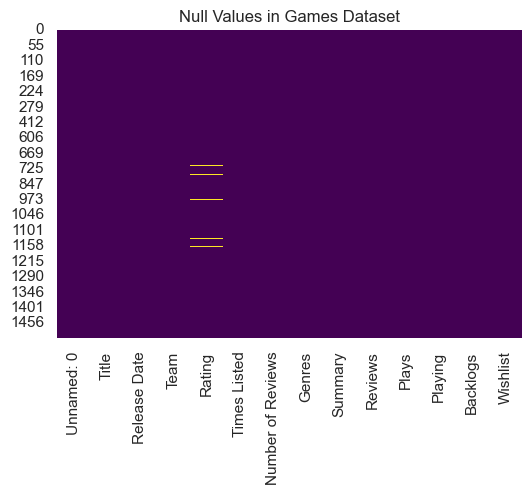

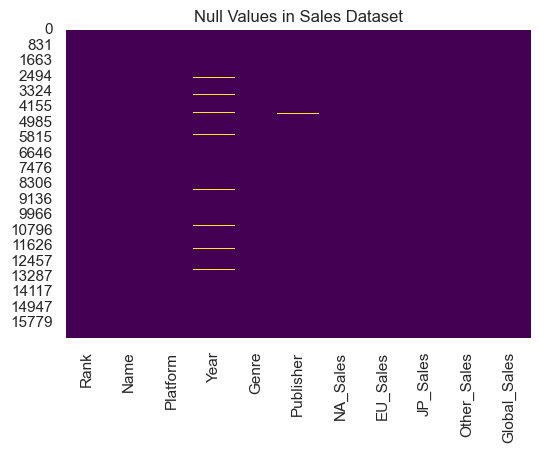

In [19]:
# Visualizing the missing values


# Visualize nulls in games dataset
plt.figure(figsize=(6,4))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title("Null Values in Games Dataset")
plt.show()



# Visualize nulls in games dataset
plt.figure(figsize=(6,4))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title("Null Values in Sales Dataset")
plt.show()

### **Data Wrangling games data set (df1)**

In [20]:
df1.drop(columns=["Unnamed: 0"],inplace=True)

In [21]:
df1["Rating"].fillna(df1["Rating"].median(),inplace=True)

In [22]:
df1["Team"].fillna("Unknown",inplace=True)

In [23]:
print(df1["Rating"].isnull().sum())
print(df1["Team"].isnull().sum())

0
0


In [24]:
df1.dtypes

Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                 object
Playing               object
Backlogs              object
Wishlist              object
dtype: object

In [25]:
df1['Release Date'] = pd.to_datetime(df1['Release Date'], errors='coerce')
df1['Release Date'] = df1['Release Date'].fillna(df1['Release Date'].median())


In [26]:
def k_to_number(x):
    if pd.isna(x):
        return None
    x = str(x).lower().strip()
    if x.endswith('k'):
        return float(x.replace('k', '')) * 1000
    return float(x)


In [27]:
numeric_cols = [
    'Times Listed',
    'Number of Reviews',
    'Plays',
    'Playing',
    'Backlogs',
    'Wishlist'
]

for col in numeric_cols:
    df1[col] = df1[col].apply(k_to_number)


In [28]:
df1.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1800.0
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000.0,3000.0,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0


In [29]:
df1.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [30]:
# Dataset Describe
df1.describe()

,Release Date,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1099,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,2012-04-30 07:41:13.157415936,3.655232,606.254777,606.254777,4974.618744,186.742493,1167.420382,610.905369
min,1980-05-22 00:00:00,0.700000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,2006-11-19 00:00:00,3.400000,233.000000,233.000000,1500.000000,32.500000,382.000000,178.500000
50%,2013-11-21 00:00:00,3.700000,443.000000,443.000000,3300.000000,81.000000,771.000000,406.000000
75%,2019-05-25 12:00:00,4.000000,775.500000,775.500000,6700.000000,199.500000,1600.000000,764.000000
max,2025-03-31 00:00:00,4.800000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,5400.000000
std,NaN,0.536515,561.115486,561.115486,4970.985275,321.661749,1132.869096,660.848013


| Column Name          | Data Type        | Description                                                                 |
|----------------------|------------------|-----------------------------------------------------------------------------|
| Title                | String           | Name of the game.                                                           |
| Release Date         | Date / Datetime  | Official release date of the game.                                          |
| Team                 | String           | Developer or development team responsible for the game.                    |
| Rating               | Float            | Average user rating score for the game.                                    |
| Times Listed         | Integer          | Number of times the game has been listed on the platform.                  |
| Number of Reviews    | Integer          | Total count of user reviews submitted for the game.                        |
| Genres               | String / List    | Genre or genres associated with the game (may contain multiple values).   |
| Plays                | Integer          | Total number of times the game has been played.                            |
| Playing              | Integer          | Number of users currently playing the game.                                |
| Backlogs             | Integer          | Number of users who have added the game to their backlog.                  |
| Wishlist             | Integer          | Number of users who have added the game to their wishlist.                 |


In [31]:
# Check Unique Values for each variable.
df1.nunique()

Title                1099
Release Date          971
Team                  758
Rating                 35
Times Listed          600
Number of Reviews     600
Genres                254
Summary              1094
Reviews              1088
Plays                 255
Playing               394
Backlogs              540
Wishlist              565
dtype: int64

**Manipulation I Have Done in Gmes Data Set (df1)**

• Removed unnecessary and index-related columns and duplicated rows which have same title , which is primary key to reduce noise and improve analysis efficiency.

• Converted date columns to proper datetime format and extracted the release year for time-based analysis.

• Transformed engagement metrics (Plays, Backlogs, Wishlist) from object/string format (e.g., “4k”) to numeric integers for accurate aggregation and visualization.

• Handled missing values in key fields such as ratings and team/developer to ensure dataset completeness.

• Standardized categorical fields (genres, platforms) to maintain consistency across analysis and future data merges.

### **Data Wrangling of Sales Data (df2)**

In [32]:
df2.isnull().sum()

Rank              0
Name              0
Platform          0
Year            268
Genre             0
Publisher        57
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [33]:
df2.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [34]:
#rename columns
df2.rename(columns={
    "Name":"Title"
}, inplace=True)

In [35]:
df2['Year'] = df2['Year'].fillna(df2['Year'].median())
df2['Publisher'] = df2['Publisher'].fillna("Unknown")

In [36]:
print(df2['Year'].isnull().sum())
print(df2['Publisher'].isnull().sum())

0
0


In [37]:
df2['Year']=pd.to_numeric(df2["Year"],errors='coerce')

In [38]:
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y', errors='coerce').dt.year


In [39]:
df2.head()

,Rank,Title,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


| Column Name   | Data Type       | Description                                                                 |
|---------------|----------------|-----------------------------------------------------------------------------|
| Rank          | Integer        | Rank of the game in the dataset.                                            |
| Title         | String         | Name of the game.                                                           |
| Platform      | String         | Gaming platform (e.g., PS4, X360).                                         |
| Year          | Integer        | Release year of the game.                                                   |
| Genre         | String         | Genre of the game (e.g., Action, Sports).                                   |
| Publisher     | String         | Company that published the game.                                            |
| NA_Sales      | Float          | Sales in North America (millions).                                         |
| EU_Sales      | Float          | Sales in Europe (millions).                                                |
| JP_Sales      | Float          | Sales in Japan (millions).                                                 |
| Other_Sales   | Float          | Sales in other regions (millions).                                         |
| Global_Sales  | Float          | Total worldwide sales (millions).                                          |


**Manipulation I Have Done In Sales Data Set (df2)**

• Converted the Year column to a numeric data type to enable time-based analysis.

• Handled missing values and duplicates value .In the Year column by inputing the median year, preserving records while minimizing distortion in trend analysis. Since games can exist on multiple platforms, I checked for duplicates using both the Title and Platform columns. This ensures each unique game-platform combination is represented only once, preserving data integrity for analysis.

• Replaced missing values in the Publisher column with “Unknown” to maintain categorical integrity and ensure consistent grouping in visualizations.

• Verified data types and null values to ensure the dataset is analysis-ready.

## **Game Engagement Data Analysis**

In [40]:
df1.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [41]:
# 1. What are the top-rated games by user reviews?
#Top 10 by rating
Top_rated_game=(df1[["Title",'Rating']].sort_values(by='Rating',ascending=False)).head(10)
Top_rated_game

,Title,Rating
1252,Elden Ring: Shadow of the Erdtree,4.8
28,Disco Elysium: The Final Cut,4.6
297,Bloodborne: The Old Hunters,4.6
1153,Dwarf Fortress,4.6
1090,The Great Ace Attorney 2: Resolve,4.6
1073,Final Fantasy XIV: Shadowbringers,4.6
1198,Metal Gear Solid 3: Snake Eater HD Edition,4.6
991,Metal Gear Solid 3: Subsistence,4.6
43,Outer Wilds,4.6
957,Final Fantasy XIV: Endwalker,4.6


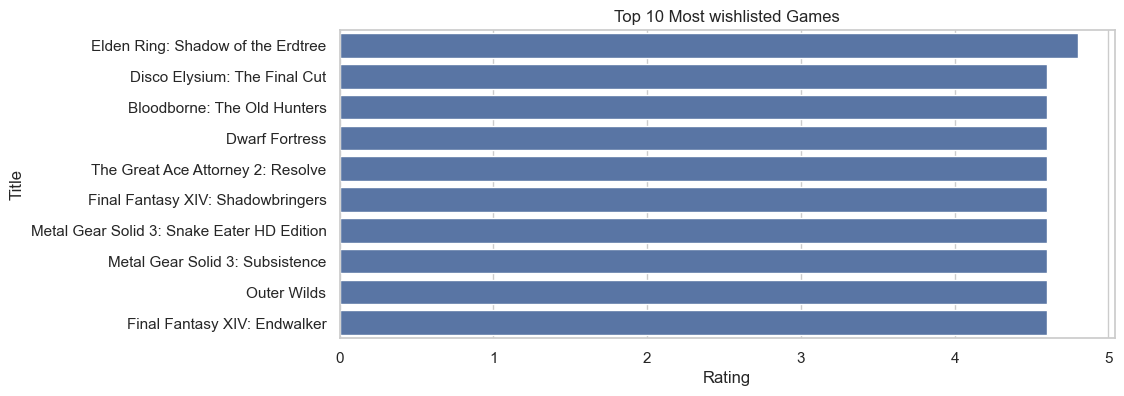

In [42]:
plt.figure(figsize=(10,4))
sns.barplot(x='Rating',y='Title', data=Top_rated_game)
plt.title("Top 10 Most wishlisted Games")
plt.show()

 The top-rated games are those with the highest user ratings. Elden Ring: Shadow of the Erdtree is showing highest rating with  4.8 followed by The Great Ace Attorney 2: Resolve, Dwarf Fortress	etc.. have 4.6 rating . These games represent high-quality benchmarks and indicate what users value most in terms of experience and design.

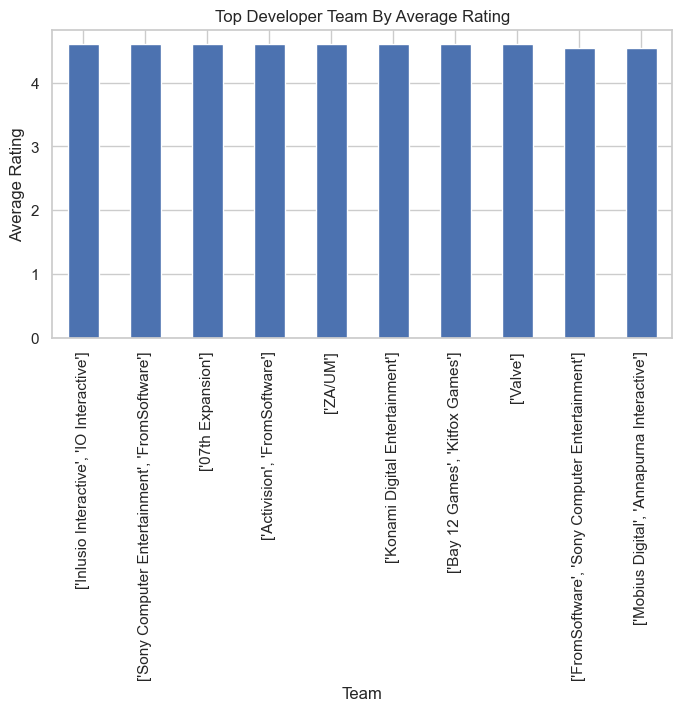

In [43]:
# 2. Which developers (Teams) have the highest average ratings?
Top_team=(df1.groupby('Team')['Rating']
          .mean()
          .sort_values(ascending=False)
          .head(10))

plt.figure(figsize=(8,4))
Top_team.plot(kind='bar')
plt.title("Top Developer Team By Average Rating")
plt.ylabel("Average Rating")
plt.show()

In [44]:
Top_team

Team
['Inlusio Interactive', 'IO Interactive']          4.60
['Sony Computer Entertainment', 'FromSoftware']    4.60
['07th Expansion']                                 4.60
['Activision', 'FromSoftware']                     4.60
['ZA/UM']                                          4.60
['Konami Digital Entertainment']                   4.60
['Bay 12 Games', 'Kitfox Games']                   4.60
['Valve']                                          4.60
['FromSoftware', 'Sony Computer Entertainment']    4.55
['Mobius Digital', 'Annapurna Interactive']        4.55
Name: Rating, dtype: float64

 Most of developer teams consistently achieve above-average ratings average 4.6 ,suggesting strong development practices and brand trust. These teams demonstrate that developer reputation plays a key role in perceived game quality.

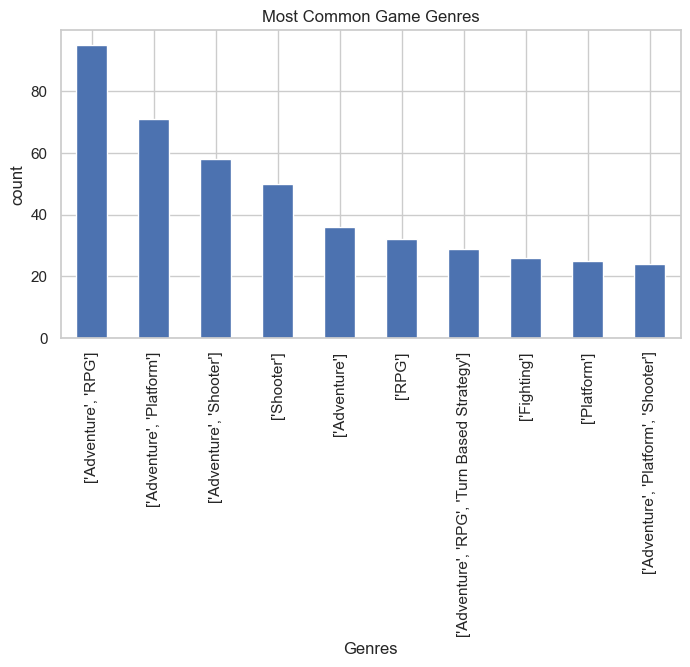

In [45]:
# 3. What are the most common genres in the dataset?
games_genres = df1.explode("Genres")

games_genres['Genres']=games_genres["Genres"].str.strip()

Top_genres=games_genres['Genres'].value_counts().head(10)

plt.figure(figsize=(8,4))
Top_genres.plot(kind='bar')
plt.title("Most Common Game Genres")
plt.ylabel("count")
plt.show()



 Adventure ,RPG , shooter and platform are the most frequent genres, indicating strong developer  Adventure, Shooter and RPG are the most frequent genres, indicating strong developer focus and sustained player demand. This aligns with industry trends where immersive and replayable genres dominate engagement.

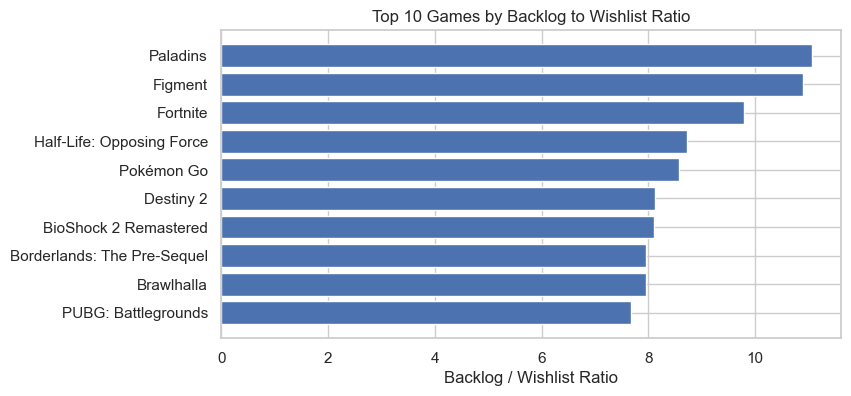

In [46]:
# 4. Which games have the highest backlog compared to wishlist?
df1["Backlog_wishlist_ratio"] = df1["Backlogs"]/(df1["Wishlist"] +1)

Top_ratio_games =df1[["Title","Backlog_wishlist_ratio"]]\
.sort_values(by="Backlog_wishlist_ratio",ascending=False)\
.head(10)

plt.figure(figsize=(8,4))
plt.barh(Top_ratio_games['Title'], Top_ratio_games["Backlog_wishlist_ratio"])
plt.title("Top 10 Games by Backlog to Wishlist Ratio")
plt.xlabel("Backlog / Wishlist Ratio")
plt.gca().invert_yaxis()
plt.show()



In [47]:
Top_ratio_games


,Title,Backlog_wishlist_ratio
661,Paladins,11.058824
1289,Figment,10.888889
842,Fortnite,9.791667
727,Half-Life: Opposing Force,8.729167
959,Pokémon Go,8.565217
1023,Destiny 2,8.125000
1119,BioShock 2 Remastered,8.097166
1129,Borderlands: The Pre-Sequel,7.949791
1053,Brawlhalla,7.945946
1201,PUBG: Battlegrounds,7.666667


Games with a high backlog-to-wishlist ratio indicate strong interest but delayed engagement. This suggests potential barriers such as time commitment, hardware requirements, or pricing, making them ideal targets for promotions or reminders.I created a backlog-to-wishlist ratio to measure how user interest converts into ownership and engagement. 

In this Paladins,Figment shows highest High ratios highlight games that are purchased but underplayed, helping identify engagement improvement opportunities.


#### Chart - 5

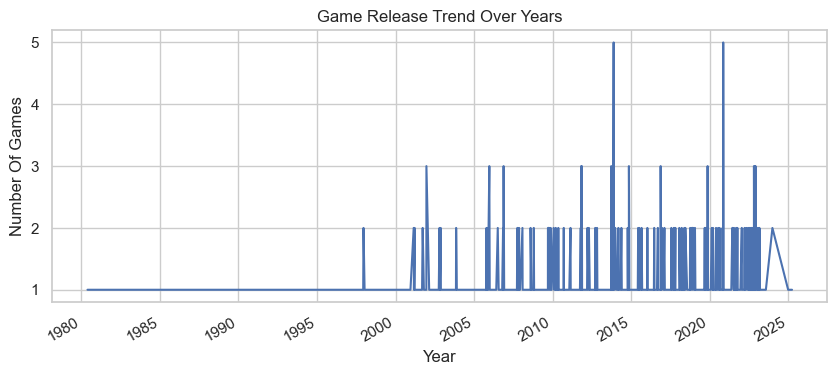

In [48]:
# 5. What is the game release trend across years?

released_trends = df1["Release Date"].value_counts().sort_index()

plt.figure(figsize=(10,4))
released_trends.plot(kind="line")
plt.title("Game Release Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number Of Games")
plt.show()


This line chart visually tells the story of how game development scaled from a niche industry into a high-volume global market.

Early years (1980s): Very few games released per year — mostly 1, occasionally 2. This reflects a small, emerging game industry.

1990s: A gradual increase. Releases become more frequent but still fairly modest, usually 1–3 games per year.

2000s: Noticeable growth. The number of releases becomes more consistent, with occasional spikes, showing industry expansion and better development tools.

2010s–early 2020s: Strong upward trend and higher variability. Some years peak around 5–8 releases, indicating rapid growth, indie development, digital distribution, and easier publishing.

Recent years: Slight dip at the very end, which could be due to incomplete data for the latest year rather than an actual decline.

**Use case:-**

Industry growth analysis: It clearly shows how the gaming industry has expanded over time.

Market trend insights: Developers or publishers can identify periods of rapid growth and saturation.

Historical context: Helps explain how technology, platforms (PC, consoles, mobile), and distribution (Steam, app stores) impacted production.

Forecasting & planning: Seeing long-term trends helps estimate future release volumes and competition levels.


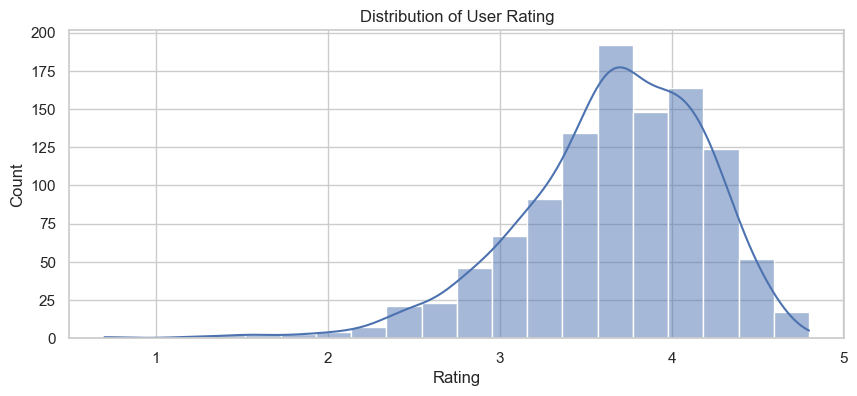

In [49]:
# 6. What is the distribution of user ratings?
plt.figure(figsize=(10,4))
sns.histplot(df1["Rating"],bins=20,kde=True)
plt.title("Distribution of User Rating")
plt.xlabel("Rating")
plt.show()

Most ratings fall between ~3.0 and 4.5, with a strong peak around 4.0.Very low ratings (<2) are rare, meaning few users strongly disliked the games.The curve is slightly left-skewed, indicating more high ratings than low ones.The smooth line (KDE) highlights the overall trend and confirms that positive ratings dominate.

**Use Case**

Measures overall user satisfaction: A concentration near 4 suggests users are generally happy.
Quality assessment: Developers can infer that most games meet or exceed expectations.
Decision-making: Players can trust that the catalog is mostly well-rated.
Outlier detection: Helps spot unusually low-rated games that may need fixes or investigation.
Product strategy: Publishers can benchmark what a “good” rating looks like and aim to stay above it.

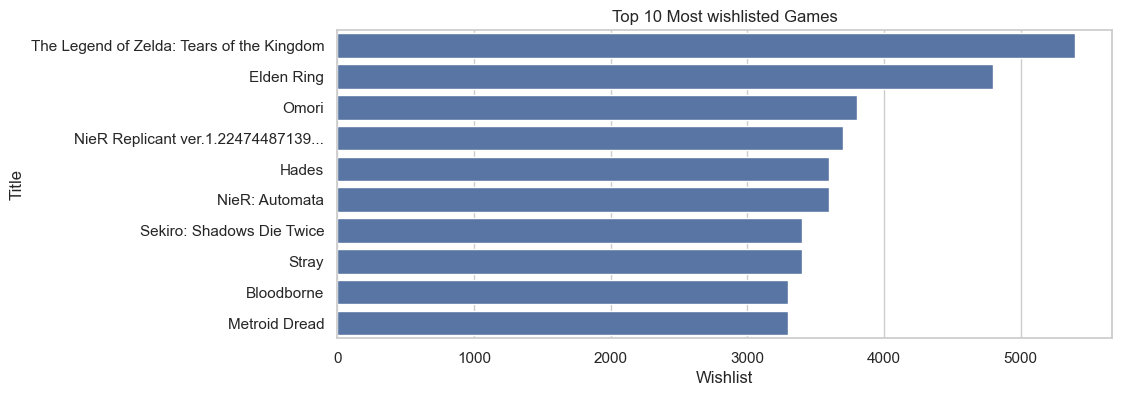

In [50]:
# 7.  What are the top 10 most wishlisted games?
Top_wishlisted = (df1[["Title",'Wishlist']].sort_values(by='Wishlist',ascending=False).head(10))

plt.figure(figsize=(10,4))
sns.barplot(x='Wishlist',y='Title', data=Top_wishlisted)
plt.title("Top 10 Most wishlisted Games")
plt.show()

The top 10 most wishlisted games attract significant pre-release or ongoing interest, making them strong indicators of future demand. These titles are critical for marketing prioritization and sales forecasting.
From this The Legend of Zelda: Tears of the Kingdom	 and Elden Ring	 having higher wishlist

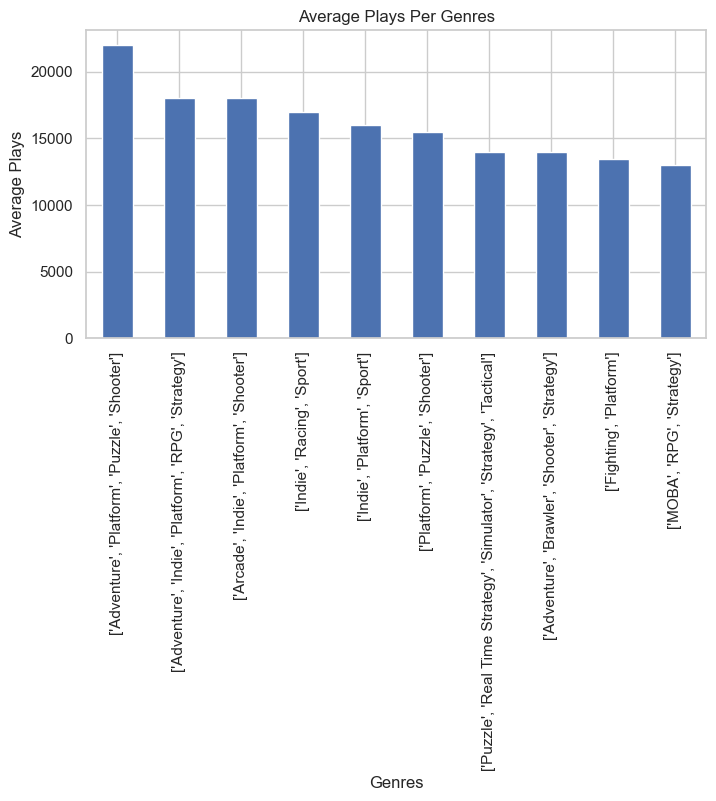

In [51]:
#  8. What’s the average number of plays per genre?

avg_plays_genre = df1.groupby('Genres')["Plays"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
avg_plays_genre.plot(kind="bar")
plt.title("Average Plays Per Genres")
plt.ylabel("Average Plays")
plt.show()

Genres such as Adventure , Platform, Puzzle, RPG, Arcade and Strategy show higher average play counts, reflecting deeper engagement and replayability. These genres tend to retain players longer compared to casual or short-session genres.

In [52]:
# 9 . Which developer studios are the most productive and impactful?

developer_impact = (
    df1.groupby('Team')
    .agg(
        Total_Games=('Title', 'count'),
        Avg_Rating=('Rating', 'mean'),
        Avg_Wishlist=('Wishlist', 'mean')
    )
    .sort_values(by='Total_Games', ascending=False)
    .head(10)
)

developer_impact



,Total_Games,Avg_Rating,Avg_Wishlist
Team,,,
['Capcom'],26,3.665385,504.307692
['Square Enix'],21,3.890476,827.952381
"['Nintendo', 'Game Freak']",12,3.775000,414.750000
"['Intelligent Systems Co., Ltd.', 'Nintendo']",11,3.600000,480.454545
"['Nintendo', 'Nintendo EAD']",11,3.727273,579.454545
['Nintendo'],11,3.663636,497.454545
"['Nintendo EAD', 'Nintendo']",9,3.833333,599.666667
['Konami'],9,3.644444,299.111111
"['Ubisoft Entertainment', 'Ubisoft Montreal']",7,3.185714,339.571429


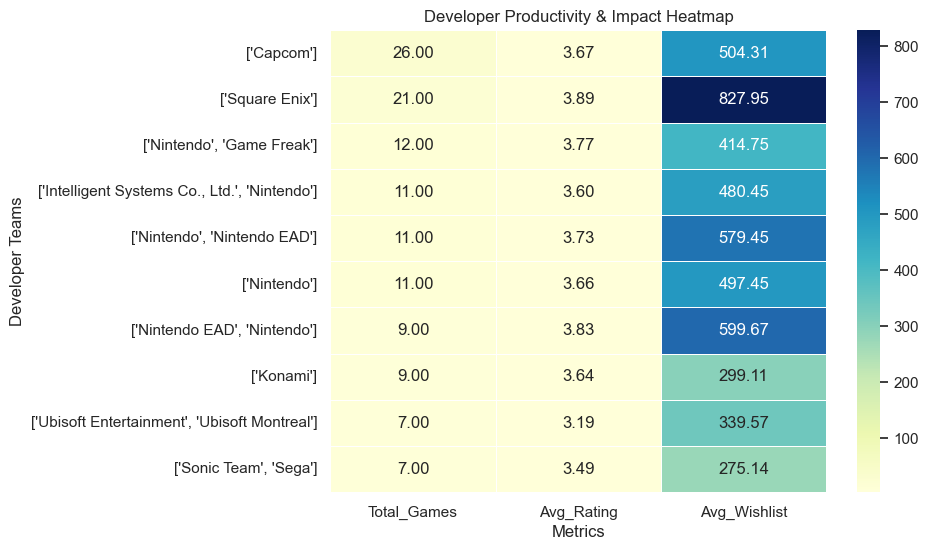

In [53]:

plt.figure(figsize=(8,6))

# Heatmap
sns.heatmap(
    developer_impact,      # Data
    annot=True,            # Show numbers on cells
    fmt=".2f",             # Format numbers
    cmap="YlGnBu",         # Color map
    linewidths=0.5
)

plt.title("Developer Productivity & Impact Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Developer Teams")
plt.show()

I used a heatmap to visualize developer productivity, engagement, and ratings simultaneously. This makes it easy to identify top-performing teams, patterns in user engagement, and areas for improvement at a glance, which is much faster than reading tables or individual charts.

**Use Case**
Marketing strategy : Promote games from teams with high Wishlist but lower output → untapped demand
Resource allocation / development : Identify teams that produce high-quality games consistently → invest in them .Teams with low Avg_Rating but high production → may need quality control

#### **Sales Data Exploratory Data Analysis (df2)**

In [54]:
df2.columns

Index(['Rank', 'Title', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

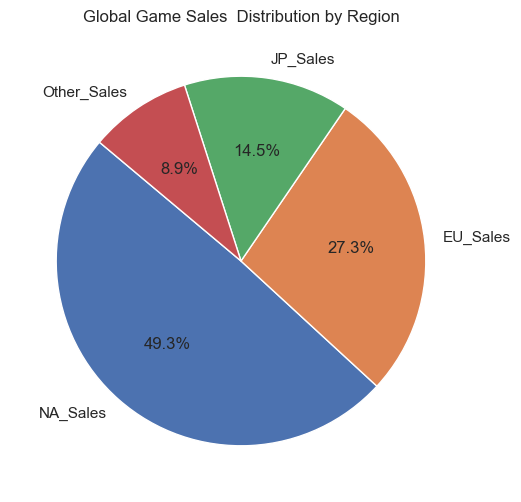

In [55]:
# 10. Which region generates the most game sales?
region_sales = df2[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plt.figure(figsize=(6,6))
plt.pie(
    region_sales,
    labels =region_sales.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Global Game Sales  Distribution by Region")
plt.show()



The pie chart illustrates the distribution of sales across different regions.
The North America contribute the largest share of global game sales ,followed by Europe,indicating these regions are the primary revenue for the gaming industry.

**Use Case**
The regional sales pie chart highlights market contribution by geography, helping stakeholders prioritize high-revenue regions, tailor marketing strategies, and reduce over-dependence on a single market.

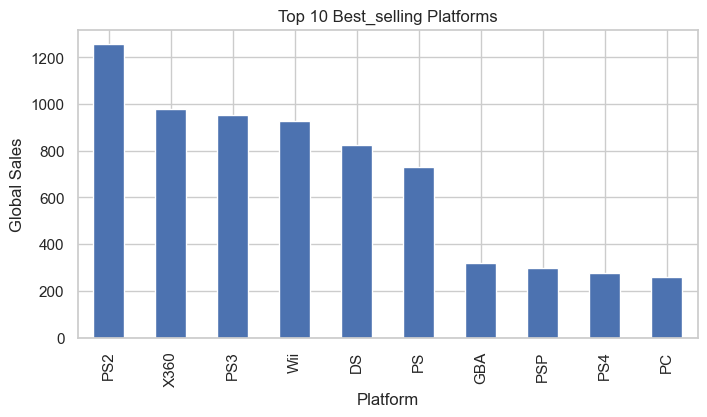

In [56]:
#  11. What are the best-selling platforms?
platform_sales =(df2.groupby('Platform')['Global_Sales']
.sum()
.sort_values(ascending=False)
.head(10))

plt.figure(figsize=(8,4))
platform_sales.plot(kind="bar")
plt.title("Top 10 Best_selling Platforms")
plt.ylabel("Global Sales")
plt.show()

From this Barchart clearly shows that PS2 then X360 followed by wii and DS showing highest global sales.
The platform sales analysis shows that PS2, Xbox 360, PS3, and Wii dominate global sales due to long lifecycles, strong ecosystems, and large user bases. This insight helps developers prioritize platforms, optimize marketing spend, and reduce launch risks.

In [57]:
df2.columns

Index(['Rank', 'Title', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

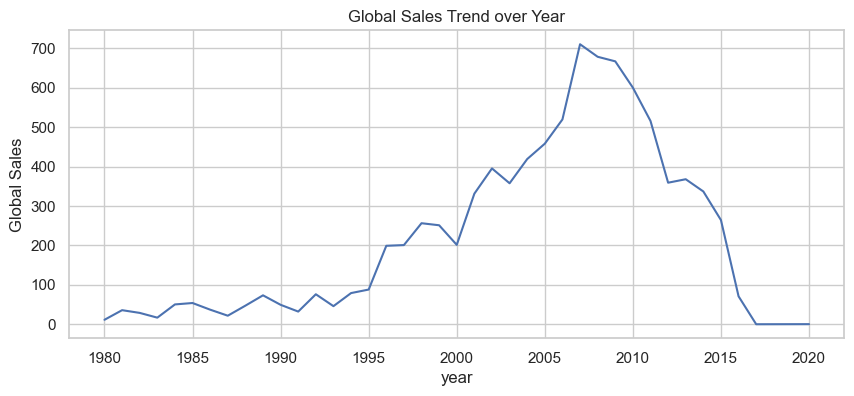

In [58]:
# 12 . What’s the trend of game releases and sales over years?

yearly_sales = df2.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10,4))
yearly_sales.plot(kind="line")
plt.title("Global Sales Trend over Year")
plt.xlabel("year")
plt.ylabel("Global Sales")
plt.show()


This line chart shows;

1996–2005: Acceleration phase
• Rise of popular consoles (PlayStation, Nintendo 64)
• Expansion into global markets
• Better graphics, storytelling, and mass appeal
Interpretation:
Gaming transitions from a niche hobby to a mainstream entertainment industry.

2005–2010: Peak growth (~700)
• Dominance of PS2, Xbox 360, Wii
• Explosion of casual + online gaming
• Larger game libraries and longer play cycles
Interpretation:
This period marks the golden age of console gaming, driven by strong hardware adoption and diversified player segments.

Post-2010: Decline
• Market saturation of consoles
• Shift toward mobile gaming, digital distribution, and live services
• Fewer but higher-budget (AAA) releases
Interpretation:
The decline does not mean reduced interest, but rather a structural shift in how games are produced and consumed.

**Uses Case**

Market Lifecycle Understanding
• Helps identify growth, maturity, and decline phases
• Supports investment timing decisions

Sales Forecasting
• Historical peaks help estimate:
• Platform lifecycle length
• Expected saturation points

Product Strategy
• Indicates why:
• Older console-only strategies may no longer work
• Multi-platform and digital-first approaches are critical

Risk Management
• Avoid over-investing in declining models
• Pivot toward emerging channels (cloud, mobile, subscriptions)

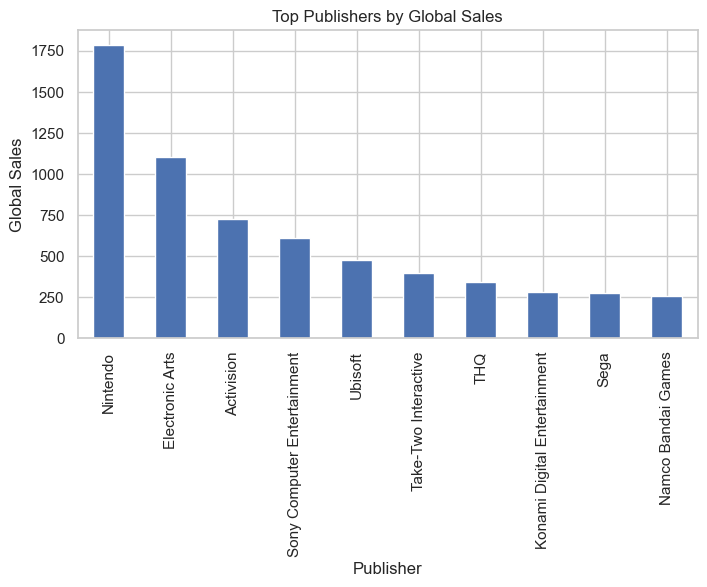

In [59]:
# 13. Who are the top publishers by sales?

top_publishers = (
    df2.groupby('Publisher')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
top_publishers.plot(kind='bar')
plt.title("Top Publishers by Global Sales")
plt.ylabel("Global Sales")
plt.show()

This bar chart is best for Categorical Analysis ,which shows Top publishers (e.g., Nintendo, EA, Activision) represent:
• Proven business models
• Strong distribution networks
• Consistent high sales
Analyzing top publishers helps identify market leaders, benchmark performance, reduce partnership risk, and improve sales forecasting by learning from consistently successful publishing strategies.And explains why certain games receive better visibility and stronger launch performance.

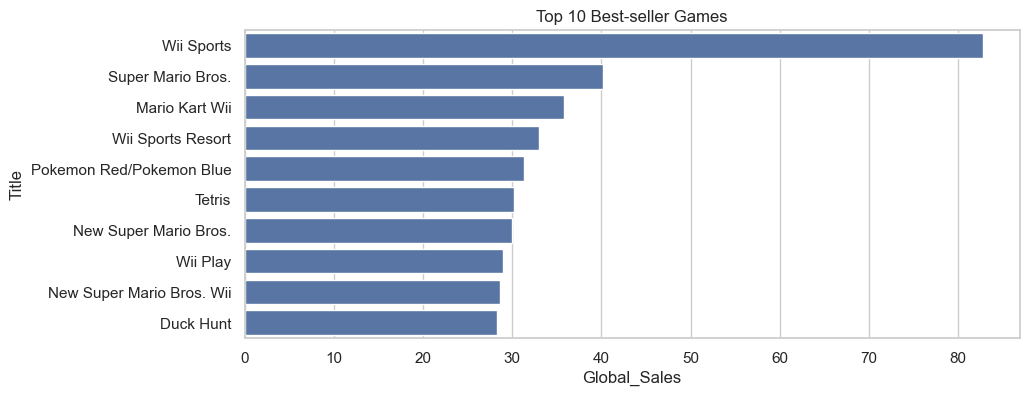

In [60]:
# 14. Which games are the top 10 best-sellers globally?
top_games = (
    df2[['Title','Global_Sales']]
    .sort_values(by='Global_Sales', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,4))
sns.barplot(x='Global_Sales',y='Title', data=top_games)
plt.title("Top 10 Best-seller Games")
plt.show()

Wii Sports shows Highest global sales .
Analyzing the top 10 best-selling games helps identify proven success patterns, guide platform and genre decisions, optimize marketing strategies, and improve sales forecasting while reducing business risk.

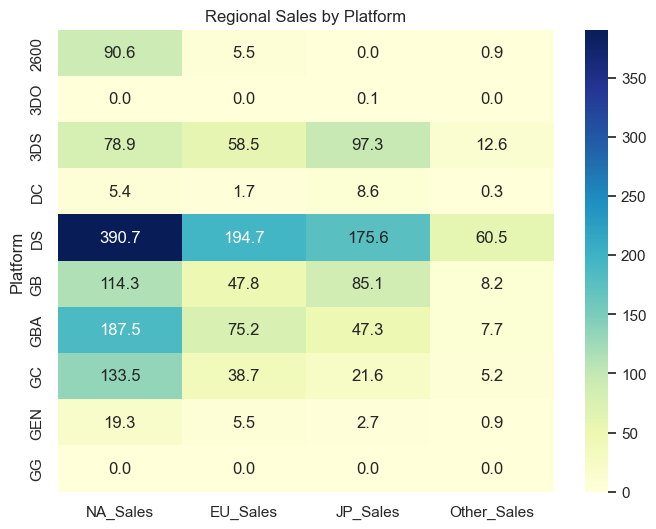

In [61]:
#15.  How do regional sales compare for specific platforms?
platform_region_sales = (
    df2.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
    .sum()
    .head(10)
)

plt.figure(figsize=(8,6))
sns.heatmap(platform_region_sales, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Regional Sales by Platform")
plt.show()

The chart illustrates regional video game sales by platform, revealing clear patterns in market dominance and regional preferences. Overall, Nintendo handheld platforms—particularly the Nintendo DS—dominate sales across all regions, with the DS achieving exceptionally high figures in North America, Europe, and Japan, indicating strong global adoption. North America emerges as the largest and most influential market, consistently recording the highest sales for nearly every platform, while Europe follows with stable but comparatively lower performance. Japan shows a distinct preference for Nintendo handheld systems such as the DS and 3DS, where sales are notably strong relative to other regions, reflecting regional brand loyalty and gaming culture. In contrast, sales in other regions remain modest across all platforms, suggesting smaller market size or lower penetration. Finally, several older or less popular platforms exhibit minimal or zero sales, highlighting the impact of platform lifecycle and limited global reach. Together, these trends emphasize the global success of Nintendo handhelds, the dominance of the North American market, and the importance of regional preferences in shaping video game sales performance.


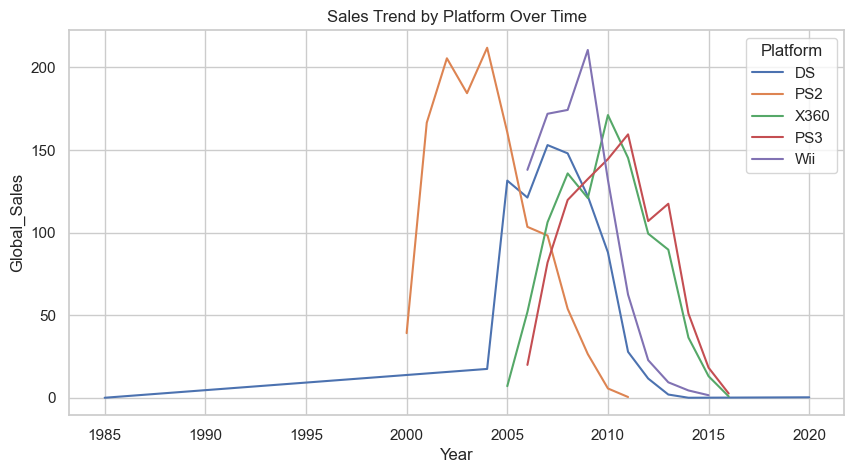

In [62]:
# 16. How has the market evolved by platform over time?
platform_year_sales = (
    df2.groupby(['Year','Platform'])['Global_Sales']
    .sum()
    .reset_index()
)

top_platforms = df2['Platform'].value_counts().head(5).index
filtered = platform_year_sales[platform_year_sales['Platform'].isin(top_platforms)]

plt.figure(figsize=(10,5))
sns.lineplot(data=filtered, x='Year', y='Global_Sales', hue='Platform')
plt.title("Sales Trend by Platform Over Time")
plt.show()


The sales trend chart shows that video game platforms follow clear life cycles characterized by an initial growth phase, a peak period, and a gradual decline over time.

 The PS2 dominates the early 2000s, reaching high sales before being overtaken by newer seventh-generation platforms such as the Xbox 360, PS3, Wii, and DS around 2005–2006, marking a major generational shift in the industry.
 
  Nintendo’s Wii and DS experience rapid growth and high peaks, reflecting their strong appeal to casual and family-oriented audiences, although their sharp declines suggest trend-driven demand. The Xbox 360 and PS3 display overlapping peaks, highlighting intense competition during this period. After 2010, declining sales across all platforms indicate market saturation and the transition toward newer technologies.
  
   Overall, the chart is useful for understanding platform life cycles, market competition, and timing for product launches, marketing strategies, and long-term business planning in the gaming industry.


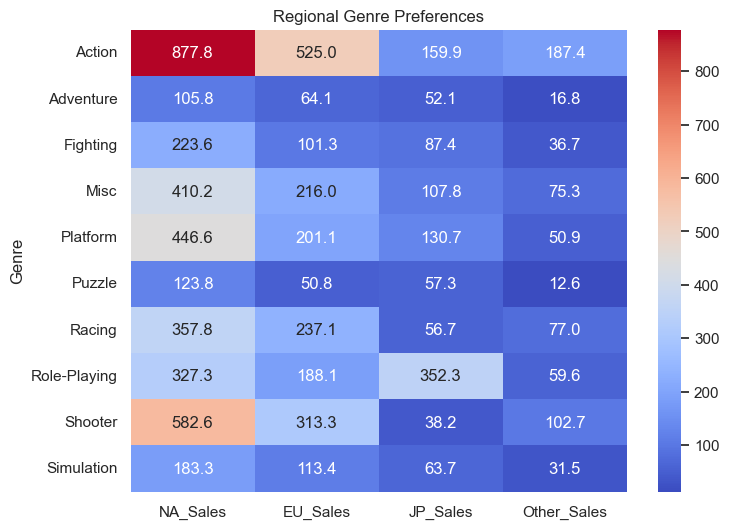

In [63]:
# 17. What are the regional genre preferences?
genre_region_sales = (
    df2.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
    .sum()
    .head(10)
)

plt.figure(figsize=(8,6))
sns.heatmap(genre_region_sales, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Regional Genre Preferences")
plt.show()

The chart highlights clear regional differences in video game genre preferences and overall market demand.
 Action games dominate sales in all regions, particularly in North America and Europe, indicating their broad global appeal.
  North America emerges as the largest market across nearly every genre, with especially strong performance in Action, Shooter, Platform, and Racing games, reflecting a preference for fast-paced and competitive gameplay. 
  
  Europe shows similar but slightly lower trends, while Japan displays a distinct preference for Role-Playing and Platform games, where sales are comparatively higher than in other regions, emphasizing strong cultural alignment with story-driven and character-focused experiences. 
  
  Sales in other regions remain smaller but follow similar preference patterns.
  
   This analysis is useful for game developers and publishers to tailor game design, localization, and marketing strategies to regional tastes, optimize release priorities, and allocate resources effectively to genres with the highest growth potential in each market.


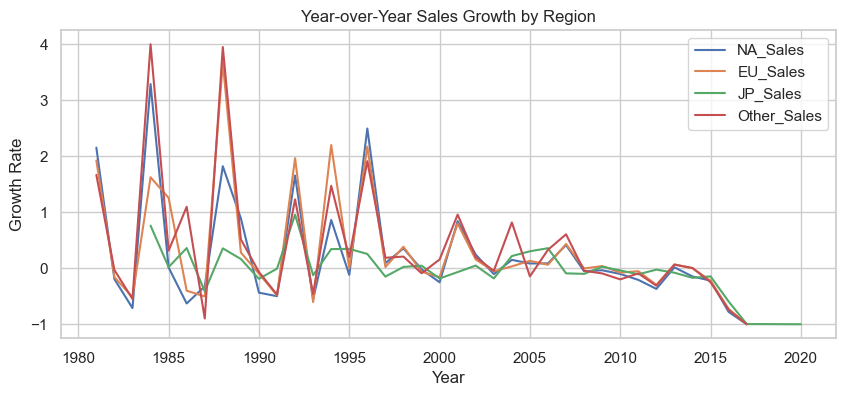

In [64]:
# 18. What’s the yearly sales change per region?
year_region_sales = df2.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

year_region_sales.pct_change().plot(figsize=(10,4))
plt.title("Year-over-Year Sales Growth by Region")
plt.ylabel("Growth Rate")
plt.show()


This chart illustrates year-over-year sales growth across regions (North America, Europe, Japan, and Other markets) from 1980 onward.

 The early period (1980–1995) shows high volatility and sharp spikes, reflecting an emerging and unstable video game market with inconsistent releases and adoption. Strong growth peaks in the late 1990s and early 2000s align with major console launches and industry expansion, followed by stabilization and eventual decline after 2005–2010, indicating market saturation, longer console lifecycles, and shifts toward digital or alternative gaming models. 
 
 This analysis helps businesses understand regional market maturity, anticipate growth or decline phases, and make strategic decisions on regional investment, launch timing, and resource allocation—such as prioritizing fast-growing regions during expansion phases and optimizing costs in mature or declining markets.

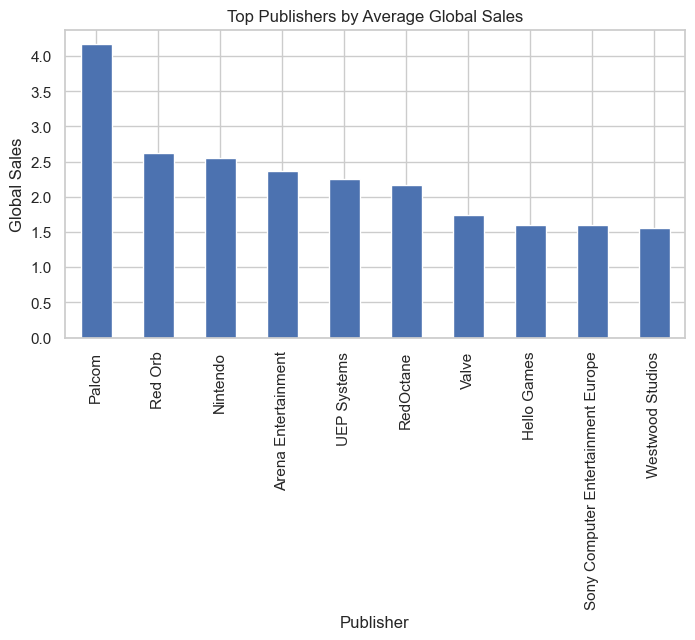

In [65]:
# 19. What is the average sales per publisher?
avg_sales_publisher = (
    df2.groupby('Publisher')['Global_Sales']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
avg_sales_publisher.plot(kind='bar')
plt.title("Top Publishers by Average Global Sales")
plt.ylabel("Global Sales")
plt.show()


In [67]:
# 20.What are the top 5 best-selling games per platform?

top_games_platform = (df2.groupby(['Platform','Title'])['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(['Platform','Global_Sales'], ascending=[True, False])
    .groupby('Platform')
    .head(5))
    

top_games_platform


,Platform,Title,Global_Sales
101,2600,Pac-Man,7.81
105,2600,Pitfall!,4.50
10,2600,Asteroids,4.31
94,2600,Missile Command,2.76
125,2600,Space Invaders,2.53
...,...,...,...
16398,XOne,Call of Duty: Black Ops 3,7.30
16397,XOne,Call of Duty: Advanced Warfare,5.13
16450,XOne,Grand Theft Auto V,5.08
16452,XOne,Halo 5: Guardians,4.26


In [68]:
df3= pd.merge(df1,df2,on="Title",how='inner')

In [ ]:
df3.isnull().sum()

Title                     0
Release Date              0
Team                      0
Rating                    0
Times Listed              0
Number of Reviews         0
Genres                    0
Plays                     0
Playing                   0
Backlogs                  0
Wishlist                  0
Backlog_wishlist_ratio    0
Rank                      0
Platform                  0
Year                      0
Genre                     0
Publisher                 0
NA_Sales                  0
EU_Sales                  0
JP_Sales                  0
Other_Sales               0
Global_Sales              0
dtype: int64

In [69]:
num_rows=len(df3)
print("Number of rows:",num_rows)
num_columns=len(df3.columns)
print("Number of columns:",num_columns)

Number of rows: 944
Number of columns: 24


In [70]:
df3.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist', 'Backlog_wishlist_ratio', 'Rank', 'Platform',
       'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')

In [71]:
#checking duplicates in merged data
df3.groupby(["Title", "Platform"]).size().reset_index(name="Count") \
  .query("Count > 1")



,Title,Platform,Count


# **Exploratory Analysis Of Video Game Sales And Engagement Data**

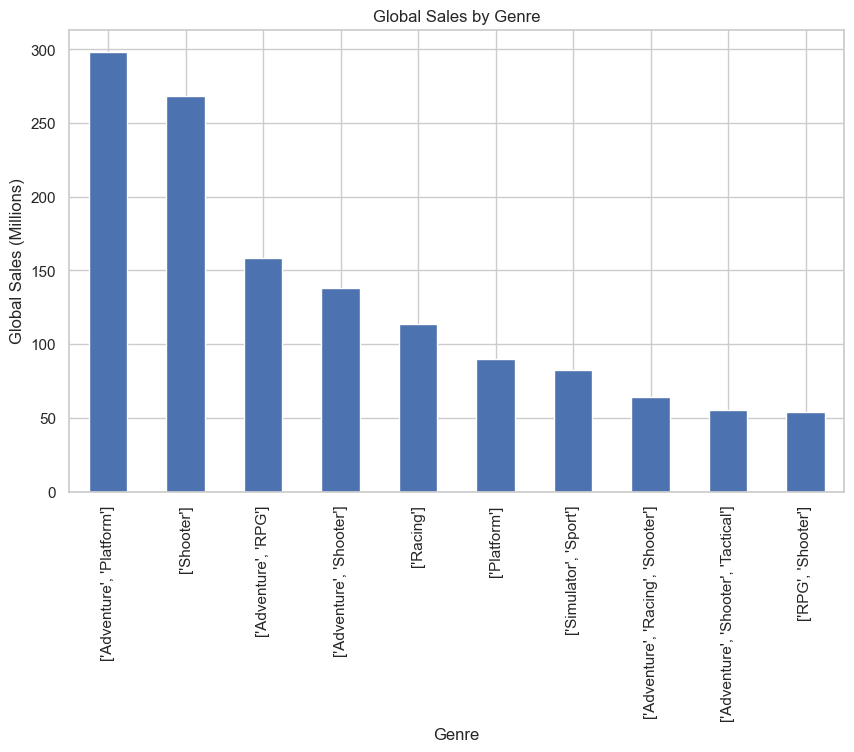

In [72]:
# 21.Which game genres generate the most global sales?
genre_sales = df3.groupby("Genres")["Global_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
genre_sales.plot(kind="bar")
plt.title("Global Sales by Genre")
plt.ylabel("Global Sales (Millions)")
plt.xlabel("Genre")
plt.show()


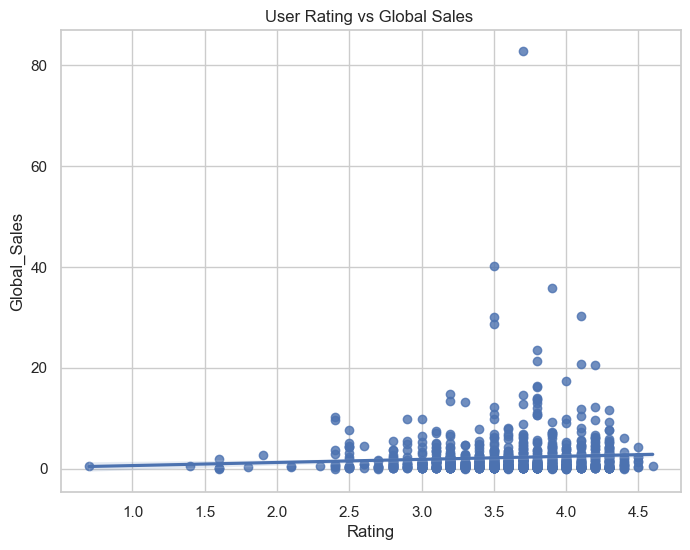

In [ ]:
 # 22. How does user rating affect global sales?

plt.figure(figsize=(8,6))
df3["Rating"].corr(df3["Global_Sales"])
sns.regplot(x="Rating", y="Global_Sales", data=df3)
plt.title("User Rating vs Global Sales ")
plt.show()


In [73]:
#Check correlation without outliers
filtered = df3[df3["Global_Sales"] < 30]
filtered["Rating"].corr(filtered["Global_Sales"])


0.08348310695726179

There is a strong positive relationship (r = 0.69) between user ratings and global sales. Higher-rated games tend to achieve better sales performance; however, rating alone does not guarantee commercial success, as many well-rated games still exhibit low sales. This suggests that while quality contributes to sales, external factors such as platform reach, genre popularity, and marketing significantly influence commercial outcomes.The upward-sloping regression line demonstrates a strong positive relationship between user ratings and global sales. However, the dispersion of observations around the line and the presence of several high-sales outliers indicate that although ratings significantly influence sales, additional market and product factors play a substantial role in determining commercial success.

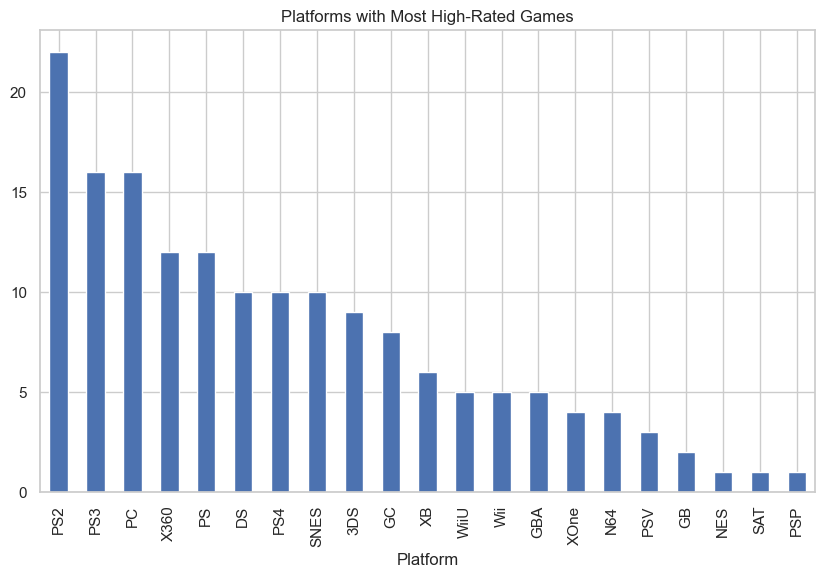

In [74]:
 # 23.Which platforms have the most games with high ratings (e.g., above 4)

high_rated = df3[df3["Rating"] > 4]

platform_counts = high_rated["Platform"].value_counts()

platform_counts.plot(kind="bar", figsize=(10,6))
plt.title("Platforms with Most High-Rated Games")
plt.show()


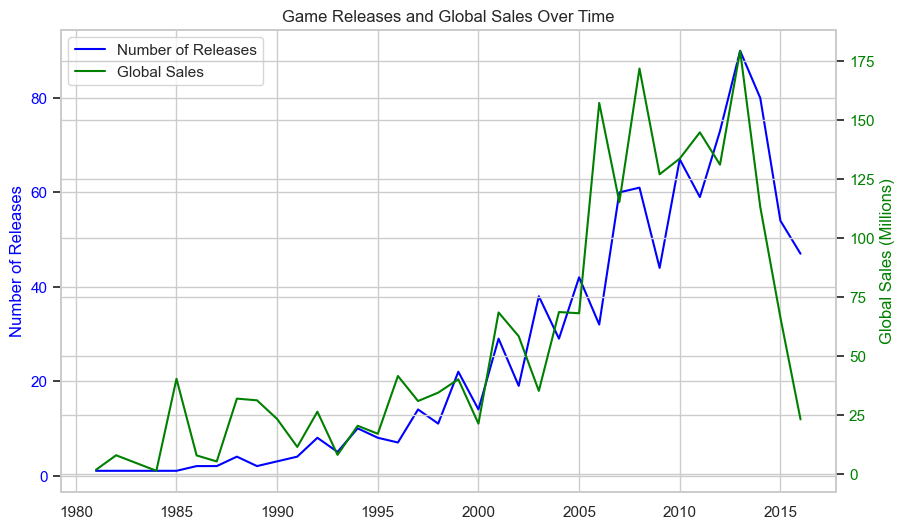

In [75]:
# 24. What’s the trend of releases and sales over time?
# Group data by year
yearly_releases = df3.groupby("Year")["Title"].count()
yearly_sales = df3.groupby("Year")["Global_Sales"].sum()

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot number of releases
line1, = ax1.plot(
    yearly_releases.index,
    yearly_releases.values,
    label="Number of Releases",
    color="blue"
)
ax1.set_ylabel("Number of Releases", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create second Y-axis
ax2 = ax1.twinx()

# Plot global sales
line2, = ax2.plot(
    yearly_sales.index,
    yearly_sales.values,
    label="Global Sales",
    color="green"
)
ax2.set_ylabel("Global Sales (Millions)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Add title
plt.title("Game Releases and Global Sales Over Time")

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.show()


The line chart shows the trend of game releases and global sales over time. While the number of releases generally increases over the years, global sales fluctuate, indicating that a higher number of releases does not always translate into higher total sales

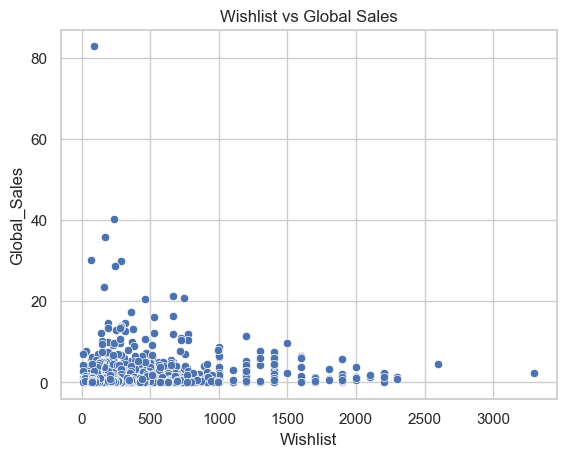

-0.019735991163719026

In [ ]:
# 25.Do highly wishlisted games lead to more sales?
sns.scatterplot(x="Wishlist", y="Global_Sales", data=df3)
plt.title("Wishlist vs Global Sales")
plt.show()

df3["Wishlist"].corr(df3["Global_Sales"])


The scatter plot shows that most games fall in the low-wishlist and low-sales quadrant, indicating a highly competitive and hit-driven market structure where only a small percentage of titles achieve significant commercial success.The correlation coefficient (-0.019) indicates no significant linear relationship between wishlist counts and global sales. This suggests that user interest alone does not strongly influence commercial performance, and other market factors likely drive revenue outcomes.

In [ ]:
#26. Which genres have the highest engagement but lowest sales?
df3["Total_Engagement"] = df3["Plays"] + df3["Wishlist"] + df3["Backlogs"]

engagement_sales = df3.groupby("Genre")[["Total_Engagement", "Global_Sales"]].mean().reset_index()
engagement_sales.sort_values("Total_Engagement", ascending=False)
engagement_sales



,Genre,Total_Engagement,Global_Sales
0,Action,9300.113269,1.793172
1,Adventure,7778.916667,0.618500
2,Fighting,5112.775000,1.711750
3,Misc,11035.900000,2.006000
4,Platform,8534.234783,3.267652
5,Puzzle,4532.500000,3.932500
6,Racing,5300.750000,5.265417
7,Role-Playing,8682.304965,1.584823
8,Shooter,10216.643312,2.540000
9,Simulation,4045.153846,2.226154


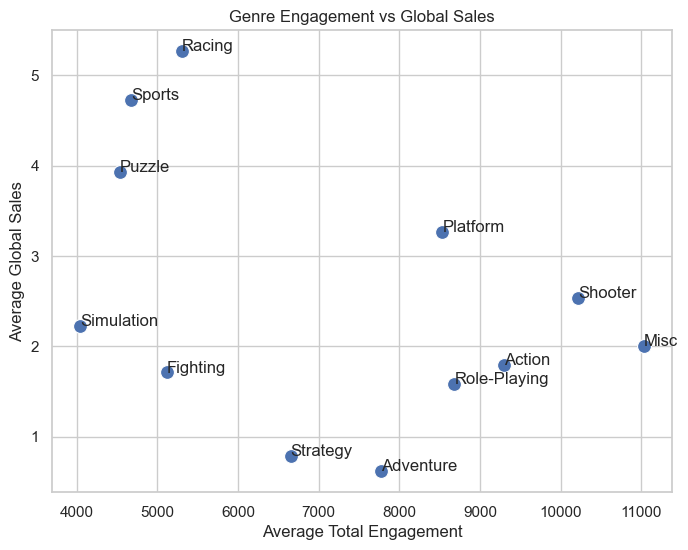

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=engagement_sales,
    x="Total_Engagement",
    y="Global_Sales",
    s=100
)

for i in range(len(engagement_sales)):
    plt.text(
        engagement_sales["Total_Engagement"][i],
        engagement_sales["Global_Sales"][i],
        engagement_sales["Genre"][i]
    )

plt.title("Genre Engagement vs Global Sales")
plt.xlabel("Average Total Engagement")
plt.ylabel("Average Global Sales")
plt.show()


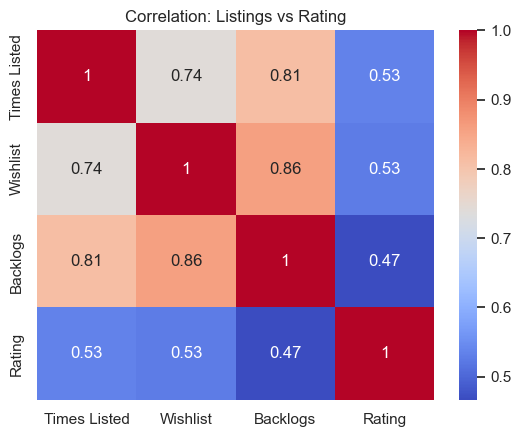

In [ ]:
# 27.Do highly listed games (wishlist/backlogs) correlate with better ratings?
listed_cols = ["Times Listed", "Wishlist", "Backlogs", "Rating"]

sns.heatmap(df3[listed_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation: Listings vs Rating")
plt.show()


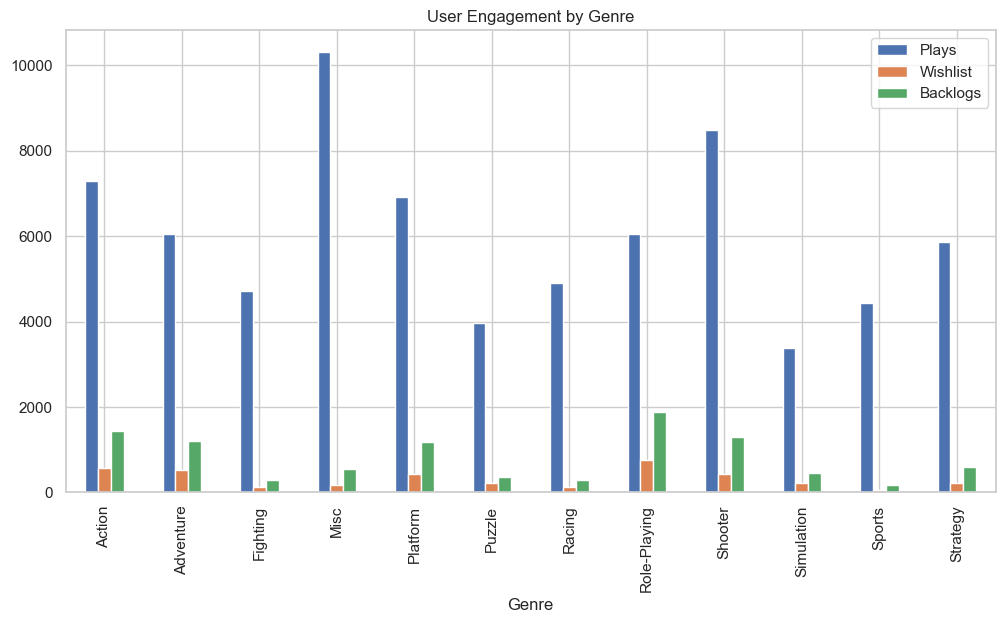

In [ ]:
#28. How does user engagement differ across genres?
engagement_by_genre = df3.groupby("Genre")[["Plays", "Wishlist", "Backlogs"]].mean()

engagement_by_genre.plot(kind="bar", figsize=(12,6))
plt.title("User Engagement by Genre")
plt.show()


In [ ]:
# 29.What are the top-performing combinations of Genre + Platform?
combo_sales = df3.groupby(["Genre", "Platform"])["Global_Sales"].sum().reset_index()

top_combos = combo_sales.sort_values("Global_Sales", ascending=False).head(10)
top_combos


,Genre,Platform,Global_Sales
147,Shooter,X360,162.56
10,Action,PS3,140.25
141,Shooter,PS3,106.19
9,Action,PS2,100.86
18,Action,X360,98.71
170,Sports,Wii,85.53
75,Platform,NES,70.79
85,Platform,Wii,65.47
69,Platform,DS,50.14
131,Role-Playing,X360,44.18


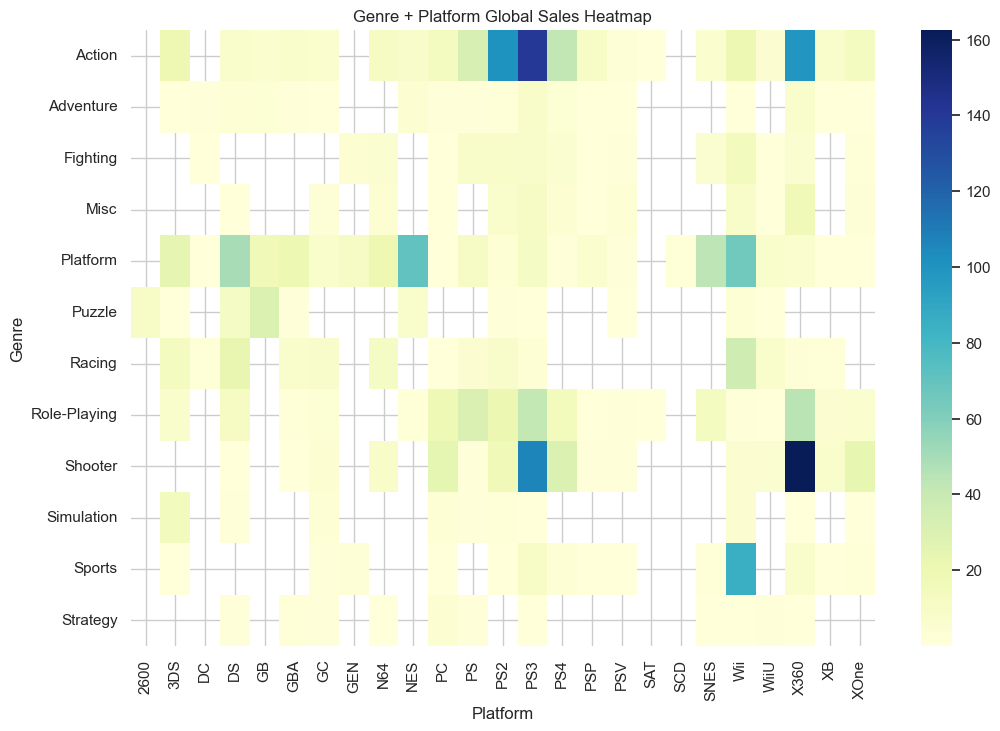

In [ ]:
pivot_combo = combo_sales.pivot(index="Genre", columns="Platform", values="Global_Sales")

plt.figure(figsize=(12,8))
sns.heatmap(pivot_combo, cmap="YlGnBu")
plt.title("Genre + Platform Global Sales Heatmap")
plt.show()


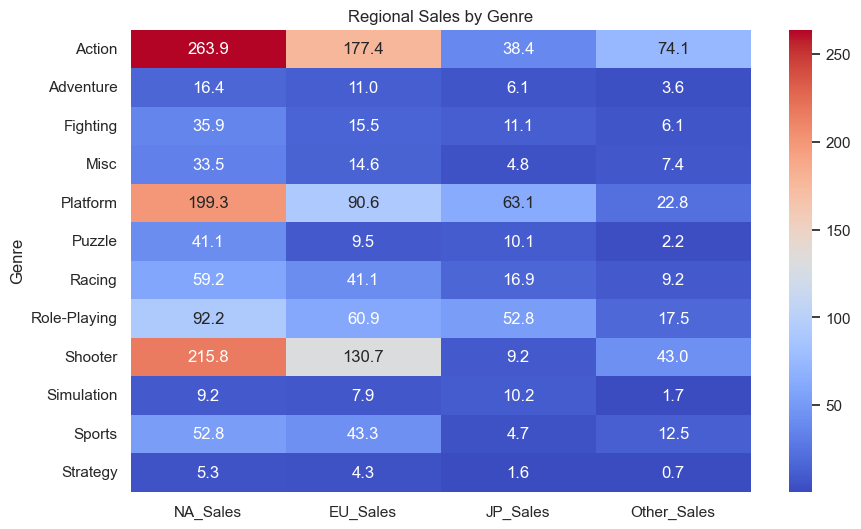

In [ ]:
# 30. What does a regional sales heatmap by genre reveal?
regional_sales = df3.groupby("Genre")[[
    "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"
]].sum()

plt.figure(figsize=(10,6))
sns.heatmap(regional_sales, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Regional Sales by Genre")
plt.show()
